<big><big><big><b> <center> ## Исламов Радмир ПИН-23

<big><big><big><b> <center> ## Варинат 15

<big><big><big><b> <center> ## Практикум 2.8. Экстремумы функции нескольких переменных <c>


<big><big><big><b> <center> ## Краткие теоретические сведения и практические упражнения

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin
from sympy import *

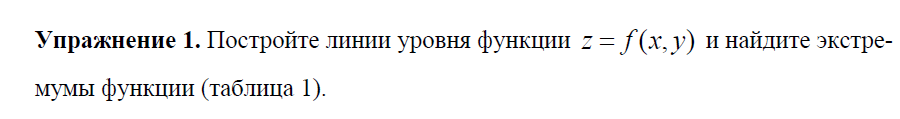

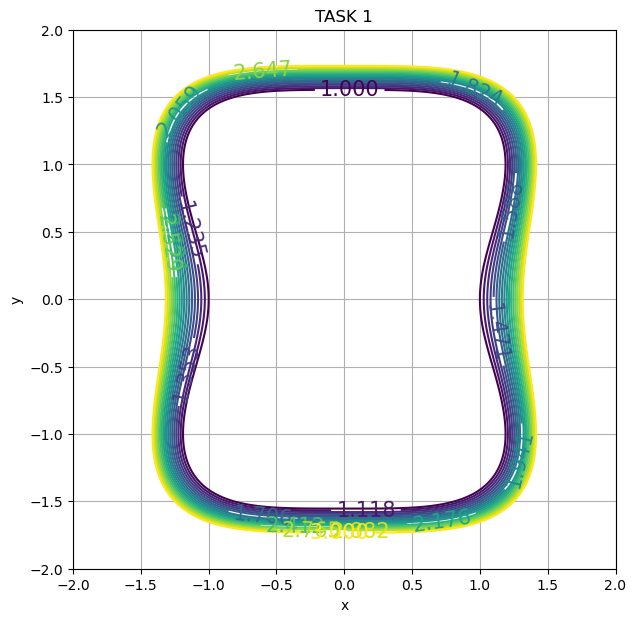

In [8]:
z = lambda t: 1 + t**2 + ((t + 2)**2)**(1/3)


xs = np.linspace(-2, 2, 201)
ys = np.linspace(-2, 2, 201)

x, y = np.meshgrid(xs, ys)

z = x**4+y**4-2*y**2

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

cs = ax.contour(x, y, z, levels=np.linspace(1, 3, 18))
ax.clabel(cs, cs.levels, inline=True, fontsize=15)

ax.grid()

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title("TASK 1")

plt.show()

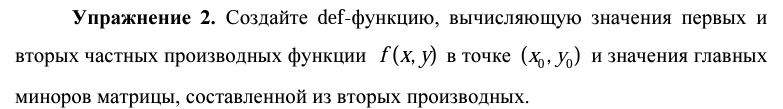

In [3]:
def calculate_derivates(f, x, y, point):
   
    der_x = diff(f, x)
    der_y = diff(f, y)
    
    der_x_val = der_x.subs([(x, point[0]), (y, point[1])])
    der_y_val = der_y.subs([(x, point[0]), (y, point[1])])

    der_x_2_val = diff(der_x, x).subs([(x, point[0]), (y, point[1])])
    der_y_2_val = diff(der_y, y).subs([(x, point[0]), (y, point[1])])

    der_x_y_val = diff(der_x, y).subs([(x, point[0]), (y, point[1])])
    der_y_x_val = diff(der_y, x).subs([(x, point[0]), (y, point[1])])
    
    matrix = Matrix([[der_x_2_val, der_x_y_val],
                     [der_y_x_val, der_y_2_val]])
    
    det = matrix.det()
    
    return der_x_val, der_y_val, der_x_2_val, der_x_y_val, der_y_2_val, der_y_x_val, (der_x_2_val, det)

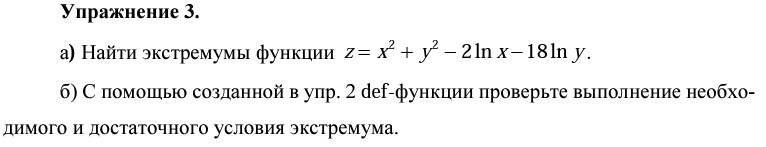

# a) #

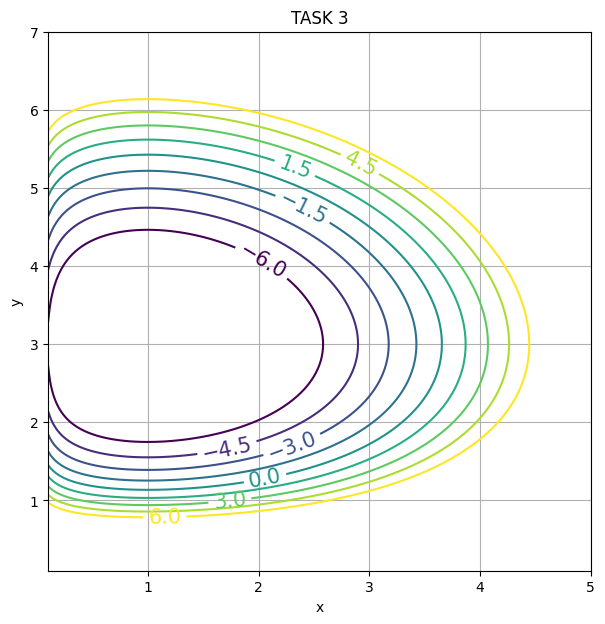

In [4]:
xs = np.linspace(0.1, 5, 201)
ys = np.linspace(0.1, 7, 201)

x, y = np.meshgrid(xs, ys)

z = x**2 + y**2 - 2*np.log(x) - 18*np.log(y)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

cs = ax.contour(x, y, z, levels=np.linspace(-6, 6, 9))
ax.clabel(cs, cs.levels, inline=True, fontsize=15)

ax.grid()

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_title("TASK 3")

plt.show()

# b) #

In [5]:
x, y = symbols('x y')

z = x**2 + y**2 - 2*log(x) - 18*log(y)

res = calculate_derivates(z, x, y, (1, 3))

print(f"Der 1 (x): {res[0]}\nDer 1 (y): {res[1]}\nDer 2 (x): {res[2]}\nDer 2 (x, y): {res[3]}")
print(f"Der 2 (y): {res[4]}\nDer 2 (y, x): {res[5]}\nDet 1 : {res[6][0]}\nDet 2 : {res[6][1]}")

Der 1 (x): 0
Der 1 (y): 0
Der 2 (x): 4
Der 2 (x, y): 0
Der 2 (y): 4
Der 2 (y, x): 0
Det 1 : 4
Det 2 : 16


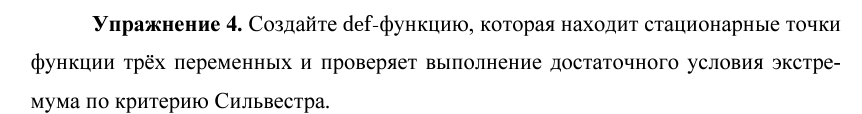

In [10]:
def findStacionarPoints(f, x, y, z, n):
    
    der_x = diff(f, x)
    der_y = diff(f, y)
    der_z = diff(f, z)
    
    point = solve([der_x, der_y, der_z])[:2]
    
    point1 = (point[0][x], point[0][y], point[n][z])
    
    der_x_2_val = diff(der_x, x).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])
    der_y_2_val = diff(der_y, y).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])
    der_z_2_val = diff(der_z, z).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])

    der_x_y_val = diff(der_x, y).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])
    der_x_z_val = diff(der_x, z).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])
    der_y_x_val = diff(der_y, x).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])
    der_y_z_val = diff(der_y, z).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])
    der_z_x_val = diff(der_z, x).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])
    der_z_y_val = diff(der_z, y).subs([(x, point1[0]), (y, point1[1]), (z, point1[2])])
    
    matrix1 = Matrix([der_x_2_val])
    
    matrix2 = Matrix([[der_x_2_val, der_x_y_val],
                      [der_y_x_val, der_y_2_val]])
    
    matrix3 = Matrix([[der_x_2_val, der_x_y_val, der_x_z_val],
                      [der_y_x_val, der_y_2_val, der_y_z_val],
                      [der_z_x_val, der_z_y_val, der_z_2_val]])
    
    det1 = matrix1.det()
    det2 = matrix2.det()
    det3 = matrix3.det()
    
    print(f"Det 1: {det1}", f"Det 2: {det2}", f"Det 3: {det3}", sep='\n')
    
    bool_t = det1 > 0 and det2 > 0 and det3 > 0
    bool_t_2 = det1 < 0 and det2 > 0 and det3 < 0
    
    return point1 if (bool_t or bool_t_2) else "Not extremum"

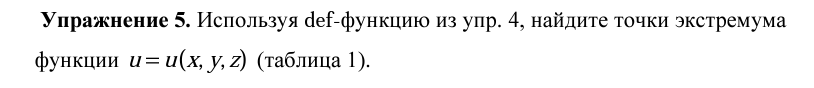

In [11]:
x, y, z = symbols('x y z')

f = ((2*x*y+3*x*z**2+y**2*z)/(x*y*z))+x+1

result = findStacionarPoints(f, x, y, z, 0)

print(f"Extremum 1: {result}\n")

result = findStacionarPoints(f, x, y, z, 1)

print(f"Extremum 2: {result}")

Det 1: -6**(3/4)/3
Det 2: 1/2
Det 3: -6**(3/4)/6
Extremum 1: (-6**(1/4), sqrt(6), -6**(3/4)/3)

Det 1: -6**(3/4)/3
Det 2: -5/6
Det 3: -6**(3/4)/3
Extremum 2: Not extremum


<big><big><big><b> <center> ## Задания для самостоятельной работы 

<big><big><b> 1) Рекомендуется построить линии уровня функции перед использованием функции `fmin` (или других методов оптимизации) для нескольких причин:

- Линии уровня помогают визуализировать геометрическое распределение значений функции. Это позволяет лучше понять её поведение и локализовать области экстремумов.
- Линии уровня могут помочь определить, насколько гладкая и выпуклая функция, и сделать предположения о возможных экстремумах.
- Анализ линий уровня может помочь выбрать подходящий метод оптимизации и начальное приближение, особенно если функция имеет множество локальных экстремумов или сложную геометрию.

<big><big><b> 2) Необходимое условие экстремума функции двух переменных гласит: если функция имеет экстремум внутри области определения, то в этой точке её частные производные по каждой переменной должны быть равны нулю или не существовать. То есть, для функции f(x, y) с экстремумом в точке (a, b), выполняются условия: ∂f/∂x(a, b) = 0 и ∂f/∂y(a, b) = 0.

<big><big><b> 3) Достаточное условие экстремума функции двух переменных гласит: если функция имеет непрерывные вторые частные производные и в точке (a, b) выполняются условия необходимого условия экстремума (∂f/∂x(a, b) = 0 и ∂f/∂y(a, b) = 0), то чтобы точка (a, b) была локальным минимумом, необходимо, чтобы матрица вторых частных производных была положительно определённой (гессиан был положительно определённым): Hf(a, b) = [[∂²f/∂x²(a, b), ∂²f/(∂x∂y)(a, b)], [∂²f/(∂y∂x)(a, b), ∂²f/∂y²(a, b)]] > 0.

<big><big><b> 4) Достаточное условие экстремума функции трех переменных аналогично условию для функции двух переменных, но в данном случае требуется положительная определённость 3x3 гессиана функции. Если функция f(x, y, z) имеет непрерывные вторые частные производные и в точке (a, b, c) выполняются условия необходимого условия экстремума (∂f/∂x(a, b, c) = 0, ∂f/∂y(a, b, c) = 0 и ∂f/∂z(a, b, c) = 0), то чтобы точка (a, b, c) была локальным минимумом, необходимо, чтобы 3x3 гессиан функции был положительно определённым: Hf(a, b, c) > 0.